# **KAIST EE**
#  **[EE488] note 01C. Maze (Advantage Actor Critic)**
## **Instructor**: Prof. Yoon, Young-Gyu (ygyoon@kaist.ac.kr)
### This example code was prepared by EE488 teaching assistants Han, Seungjae (jay0118@kaist.ac.kr) & Shin, Changyeop (scey26@kaist.ac.kr).

- Class Date : 22.03.xx.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

---

### 0. In this example, we will implement **A2C**  (Advantage Actor-Critic) for solving a simple custom maze environment (see the image below). Each location corresponds to a state, and the agent needs to move up/down/left/right to move from Start to Goal.


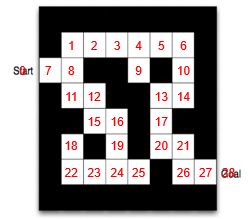

### 1. As usual, let's start with **importing libraries**!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from datetime import datetime

from matplotlib import animation
from IPython.display import HTML, clear_output

import torch
from torch.distributions import Categorical
import torch.nn as nn
import torch.nn.functional as F

from collections import deque               # this simplifies the implementation of the replay buffer

### 3. Here's our **custom environment**. It's basically the same as the maze shown above.

In [2]:
class maze_env():
# the maze shown above is scripted as a custom environment.
    def __init__(self):
        self.state = 7
        self.done = 0

    def step(self, action):
        state = self.state

        if state==0:
            if action==0:
                state, reward, done = 0, -1, 0
            elif action==1:
                state, reward, done = 0, -1, 0
            elif action==2:
                state, reward, done = 0, -1, 0
            elif action==3:                   
                state, reward, done = 7, -1, 0
            else:          
                print('action error')                
        elif state==1:
            if action==0:
                state, reward, done = 1, -1, 0
            elif action==1:
                state, reward, done = 8, -1, 0
            elif action==2:
                state, reward, done = 1, -1, 0
            elif action==3:              
                state, reward, done = 2, -1, 0
            else:          
                print('action error')                      
        elif state==2:
            if action==0:
                state, reward, done = 2, -1, 0
            elif action==1:
                state, reward, done = 2, -1, 0
            elif action==2:
                state, reward, done = 1, -1, 0
            elif action==3:                 
                state, reward, done = 3, -1, 0
            else:          
                print('action error')                      
        elif state==3:
            if action==0:
                state, reward, done = 3, -1, 0
            elif action==1:
                state, reward, done = 3, -1, 0
            elif action==2:
                state, reward, done = 2, -1, 0
            elif action==3:                
                state, reward, done = 4, -1, 0
            else:          
                print('action error')                      
        elif state==4:
            if action==0:
                state, reward, done = 4, -1, 0
            elif action==1:
                state, reward, done = 9, -1, 0
            elif action==2:
                state, reward, done = 3, -1, 0
            elif action==3:                  
                state, reward, done = 5, -1, 0
            else:          
                print('action error')                      
        elif state==5:
            if action==0:
                state, reward, done = 5, -1, 0
            elif action==1:
                state, reward, done = 5, -1, 0
            elif action==2:
                state, reward, done = 4, -1, 0
            elif action==3:                 
                state, reward, done = 6, -1, 0
            else:          
                print('action error')                      
        elif state==6:
            if action==0:
                state, reward, done = 6, -1, 0
            elif action==1:
                state, reward, done = 10, -1, 0
            elif action==2:
                state, reward, done = 5, -1, 0
            elif action==3:                   
                state, reward, done = 6, -1, 0
            else:          
                print('action error')                      
        elif state==7:
            if action==0:
                state, reward, done = 7, -1, 0
            elif action==1:
                state, reward, done = 7, -1, 0
            elif action==2:
                state, reward, done = 0, -1, 0
            elif action==3:                    
                state, reward, done = 8, -1, 0
            else:          
                print('action error')                      
        elif state==8:
            if action==0:
                state, reward, done = 1, -1, 0
            elif action==1:
                state, reward, done = 11, -1, 0
            elif action==2:
                state, reward, done = 7, -1, 0
            elif action==3:                    
                state, reward, done = 8, -1, 0
            else:          
                print('action error')                      
        elif state==9:
            if action==0:
                state, reward, done = 4, -1, 0
            elif action==1:
                state, reward, done = 9, -1, 0
            elif action==2:
                state, reward, done = 9, -1, 0
            elif action==3:                  
                state, reward, done = 9, -1, 0
            else:          
                print('action error')                      
        elif state==10:
            if action==0:
                state, reward, done = 6, -1, 0
            elif action==1:
                state, reward, done = 14, -1, 0
            elif action==2:
                state, reward, done = 10, -1, 0
            elif action==3:                 
                state, reward, done = 10, -1, 0
            else:          
                print('action error')                      
        elif state==11:
            if action==0:
                state, reward, done = 8, -1, 0
            elif action==1:
                state, reward, done = 11, -1, 0
            elif action==2:
                state, reward, done = 11, -1, 0
            elif action==3:                  
                state, reward, done = 12, -1, 0
            else:          
                print('action error')                      
        elif state==12:
            if action==0:
                state, reward, done = 12, -1, 0
            elif action==1:
                state, reward, done = 15, -1, 0
            elif action==2:
                state, reward, done = 11, -1, 0
            elif action==3:                   
                state, reward, done = 12, -1, 0
            else:          
                print('action error')                      
        elif state==13:
            if action==0:
                state, reward, done = 13, -1, 0
            elif action==1:
                state, reward, done = 17, -1, 0
            elif action==2:
                state, reward, done = 13, -1, 0
            elif action==3:                   
                state, reward, done = 14, -1, 0
            else:          
                print('action error')                      
        elif state==14:
            if action==0:
                state, reward, done = 10, -1, 0
            elif action==1:
                state, reward, done = 14, -1, 0
            elif action==2:
                state, reward, done = 13, -1, 0
            elif action==3:                   
                state, reward, done = 14, -1, 0
            else:          
                print('action error')                      
        elif state==15:
            if action==0:
                state, reward, done = 12, -1, 0
            elif action==1:
                state, reward, done = 15, -1, 0
            elif action==2:
                state, reward, done = 15, -1, 0
            elif action==3:                    
                state, reward, done = 16, -1, 0
            else:          
                print('action error')                      
        elif state==16:
            if action==0:
                state, reward, done = 16, -1, 0
            elif action==1:
                state, reward, done = 19, -1, 0
            elif action==2:
                state, reward, done = 15, -1, 0
            elif action==3:                    
                state, reward, done = 16, -1, 0
            else:          
                print('action error')                      
        elif state==17:
            if action==0:
                state, reward, done = 13, -1, 0
            elif action==1:
                state, reward, done = 20, -1, 0
            elif action==2:
                state, reward, done = 17, -1, 0
            elif action==3:                    
                state, reward, done = 17, -1, 0
            else:          
                print('action error')                      
        elif state==18:
            if action==0:
                state, reward, done = 18, -1, 0
            elif action==1:
                state, reward, done = 22, -1, 0
            elif action==2:
                state, reward, done = 18, -1, 0
            elif action==3:                    
                state, reward, done = 18, -1, 0
            else:          
                print('action error')                      
        elif state==19:
            if action==0:
                state, reward, done = 16, -1, 0
            elif action==1:
                state, reward, done = 24, -1, 0
            elif action==2:
                state, reward, done = 19, -1, 0
            elif action==3:                    
                state, reward, done = 19, -1, 0
            else:          
                print('action error')                      
        elif state==20:
            if action==0:
                state, reward, done = 17, -1, 0
            elif action==1:
                state, reward, done = 20, -1, 0
            elif action==2:
                state, reward, done = 20, -1, 0
            elif action==3:                    
                state, reward, done = 21, -1, 0
            else:          
                print('action error')                      
        elif state==21:
            if action==0:
                state, reward, done = 21, -1, 0
            elif action==1:
                state, reward, done = 26, -1, 0
            elif action==2:
                state, reward, done = 20, -1, 0
            elif action==3:                   
                state, reward, done = 21, -1, 0
            else:          
                print('action error')                      
        elif state==22:
            if action==0:
                state, reward, done = 18, -1, 0
            elif action==1:
                state, reward, done = 22, -1, 0
            elif action==2:
                state, reward, done = 22, -1, 0
            elif action==3:                    
                state, reward, done = 23, -1, 0
            else:          
                print('action error')                      
        elif state==23:
            if action==0:
                state, reward, done = 23, -1, 0
            elif action==1:
                state, reward, done = 23, -1, 0
            elif action==2:
                state, reward, done = 22, -1, 0
            elif action==3:                   
                state, reward, done = 24, -1, 0
            else:          
                print('action error')                      
        elif state==24:
            if action==0:
                state, reward, done = 19, -1, 0
            elif action==1:
                state, reward, done = 24, -1, 0
            elif action==2:
                state, reward, done = 23, -1, 0
            elif action==3:                    
                state, reward, done = 25, -1, 0
            else:          
                print('action error')                      
        elif state==25:
            if action==0:
                state, reward, done = 25, -1, 0
            elif action==1:
                state, reward, done = 25, -1, 0
            elif action==2:
                state, reward, done = 24, -1, 0
            elif action==3:                    
                state, reward, done = 25, -1, 0
            else:          
                print('action error')                      
        elif state==26:
            if action==0:
                state, reward, done = 21, -1, 0
            elif action==1:
                state, reward, done = 26, -1, 0
            elif action==2:
                state, reward, done = 26, -1, 0
            elif action==3:                 
                state, reward, done = 27, -1, 0
            else:          
                print('action error')                      
        elif state==27:
            if action==0:
                state, reward, done = 27, -1, 0
            elif action==1:
                state, reward, done = 27, -1, 0
            elif action==2:
                state, reward, done = 26, -1, 0
            elif action==3:                    
                state, reward, done = 27, 0, 1
            else:          
                print('action error')                                    
        else:          
                print('state error')             

        self.state = state
        self.done = done
                
        return state, reward, done

### 4. Let's define our networks (**actor network** and **critic network**). 

In [3]:
class actor_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(28, 4)     # 28-dimensional observation (onehot encoding)
        self.smax = nn.Softmax(dim=-1)

    def forward(self, x):
        x = self.fc(x)
        x = self.smax(x)

        return x

class critic_network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(28, 1)     # 28-dimensional observation (onehot encoding)

    def forward(self, x):
        x = self.fc(x)

        return x        

### 5. Here are our **hyperparameters**.

In [4]:
discount = 0.99         # discount factor gamma
max_time_steps = 3000    # maximum episode length. What will happen if we decrease or increase this?

reward_recent_history = deque(maxlen=30)  # for computing average reward over 30 episodes

### 6. Let's initialize our networks.

In [5]:
# network and optimizer
actor = actor_network()
critic = critic_network()

optimizer_a = torch.optim.Adam(actor.parameters(), lr=0.003)
optimizer_c = torch.optim.Adam(critic.parameters(), lr=0.003)

action_space = np.arange(4)

### 7. Test the performance of the untrained network!

In [6]:
# TEST (with untrained actor network)
env = maze_env()
rewards = 0

for t in range(max_time_steps):
    
    # choose action (by following the policy)
    state_oh = torch.from_numpy(np.eye(28)[env.state]).float()
    
    action_probs = actor(state_oh)        
    action_prob_detach = action_probs.detach().numpy()
    action = np.random.choice(action_space, p=action_prob_detach) 

    # proceed one step (in the environment) 
    state_next, reward, done = env.step(action)

    if done:
        break

    rewards = rewards + reward        


print("Total reward is " + str(rewards) + ".")

Total reward is -1083.


### 8. Define a function to **keep track of the performance**.

In [7]:
def plt_history():
    clear_output(True)
    plt.figure(figsize=[16, 9])
    plt.title("Reward history")
    plt.plot(reward_history)
    
    plt.grid()
    plt.show()

### 9. Let's start **training**! 
The actor network is updated using the following equation.
$$\nabla_{\theta}J(\theta) = \sum_{t \geq 0} A(s_t, a_t) \nabla_{\theta} \log \pi_{\theta} (a_t | s_t) $$
where $ A(s_t, a_t) = Q(s_t, a_t) - V(s_t)$ is the advantage function.



> The advantage function is updated to minimize the following.
$$ \mathcal{L} = (A(s,a) - \mathbb{E}[r+ \gamma A(s',a')])^2  $$

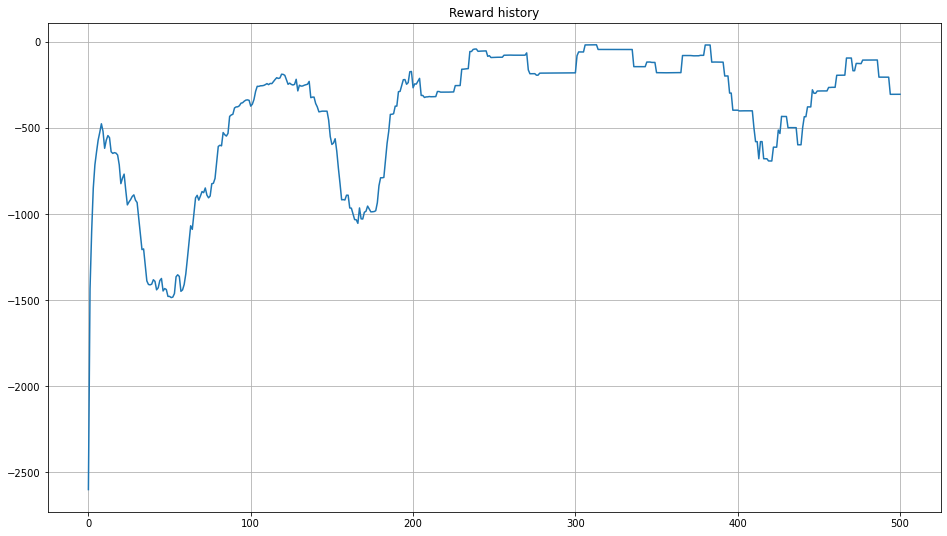

tensor(-15.)
Early stopping as the exit condition is met.


In [8]:
reward_history = []

# training
for episode in range(20000):

    # initialization
    env = maze_env()
    log_probs = torch.zeros(max_time_steps)
    rewards = torch.zeros(max_time_steps)

    # loop until an episode ends
    for t in range(max_time_steps):

        # choose action (by following the policy)
        state_oh = torch.from_numpy(np.eye(28)[env.state]).float()        
        action_probs = actor(state_oh)        
        action_prob_detach = action_probs.detach().numpy()
        action = np.random.choice(action_space, p=action_prob_detach)
        log_prob = torch.log(action_probs[action])        

        # proceed one step (in the environment) 
        state_next, reward, done = env.step(action)
        state_next_oh = torch.from_numpy(np.eye(28)[state_next]).float()  

        # calculate advantage
        advantage = reward + (1-done)*discount*critic(state_next_oh) - critic(state_oh)
        
        # perform critic update 
        critic_loss = advantage.pow(2).mean()
        optimizer_c.zero_grad()
        critic_loss.backward()
        optimizer_c.step()

        # perform actor update 
        actor_loss = -log_prob*advantage.detach()
        optimizer_a.zero_grad()
        actor_loss.backward()
        optimizer_a.step()

        rewards[t] = reward
        #log_probs[t] = log_prob

        if done:
            break

    # Let's keep track of things
    reward_recent_history.append(rewards.sum())
    recent_average_reward = np.mean(reward_recent_history)
    reward_history.append(recent_average_reward)
    
    if episode%100 == 0:    
        plt_history()
        print(rewards.sum())

    if recent_average_reward>-16.2: # We know that -16 is the best we can get. Let's exit if the recent average is above -16.2
        print("Early stopping as the exit condition is met.")
        break  



### 10. Now, let's **evaluate** the performance of the trained network!

In [14]:
# TEST (with trained actor network)
env = maze_env()
rewards = 0

for t in range(max_time_steps):
    
    # choose action (by following the policy)
    state_oh = torch.from_numpy(np.eye(28)[env.state]).float()    
    action_probs = actor(state_oh)        
    action_prob_detach = action_probs.detach().numpy()
    action = np.random.choice(action_space, p=action_prob_detach) 

    # proceed one step (in the environment) 
    state_next, reward, done = env.step(action)

    if done:
        break

    rewards = rewards + reward        


print("Total reward is " + str(rewards) + ".")

Total reward is -15.


Below is a visualization of states.

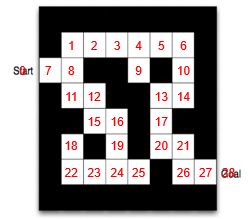

And below shows the optimal policy.

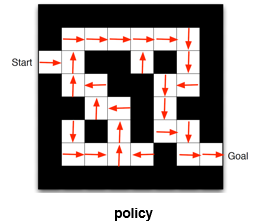

### 11. Compare learned policy with the **optimal policy**.

In [11]:
for i in range(28):    
    action_probs = actor(torch.from_numpy(np.eye(28)[i]).float()).detach().numpy()    
    print(action_probs)

[0.11347641 0.07423206 0.522174   0.29011762]
[0.00926758 0.0054288  0.01207041 0.97323316]
[0.01386172 0.00859062 0.03480681 0.94274086]
[0.01762117 0.01646184 0.01740974 0.9485073 ]
[0.00281817 0.00835344 0.0142502  0.9745782 ]
[1.4434227e-04 2.5528355e-03 2.5632940e-03 9.9473959e-01]
[0.00105768 0.9724568  0.00577918 0.02070635]
[0.03501685 0.00857778 0.05272432 0.90368104]
[0.83473164 0.04472993 0.04696931 0.07356922]
[0.06994612 0.05885957 0.15957023 0.71162415]
[3.2083834e-05 9.9746656e-01 2.0071126e-04 2.3006317e-03]
[0.01896807 0.08113743 0.54793555 0.35195893]
[0.07839367 0.06823865 0.17310427 0.68026346]
[5.4397668e-07 9.9998367e-01 6.7472627e-07 1.5000347e-05]
[7.4149318e-07 4.1775934e-06 9.9998224e-01 1.2820392e-05]
[0.06586347 0.14588043 0.27404726 0.51420885]
[0.02016339 0.01173751 0.03456742 0.93353164]
[1.3938916e-08 9.9999988e-01 2.1372362e-08 7.2446717e-08]
[0.04561    0.01951481 0.24941643 0.6854588 ]
[0.02709792 0.04922574 0.17002429 0.753652  ]
[4.7431654e-09 6.416

### **Congratulations**! You sucessfully trained A2C.